In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from pandas.plotting import scatter_matrix
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [41]:
#Get Tesla stock data
tesla = pd.read_csv('Tesla_Stock.csv',index_col='Date',parse_dates = True)

In [42]:
#Get Ford and General Motors stock data
ford = pd.read_csv('Ford_Stock.csv',index_col='Date',parse_dates = True)
gm = pd.read_csv('GM_Stock.csv',index_col='Date',parse_dates = True)

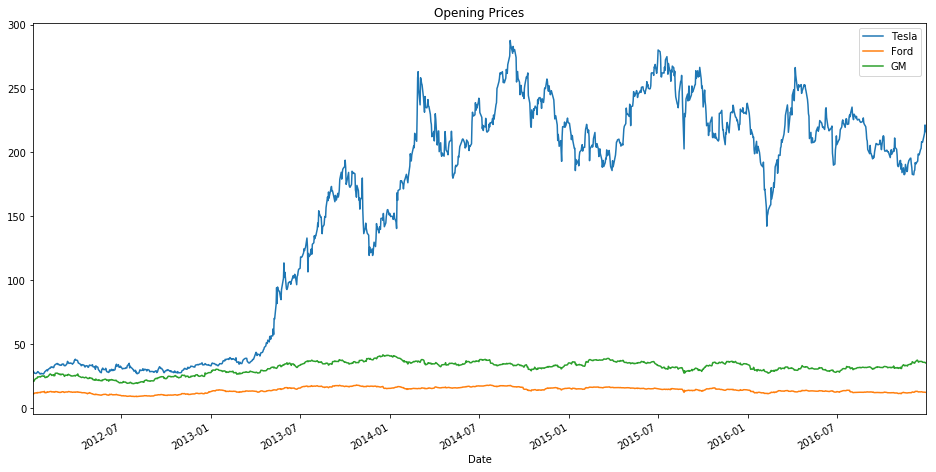

In [43]:
# Plot opening stock prices of Tesla,Ford and General Motors over this time period
tesla['Open'].plot(figsize = (16,8),label='Tesla',title='Opening Prices')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend();

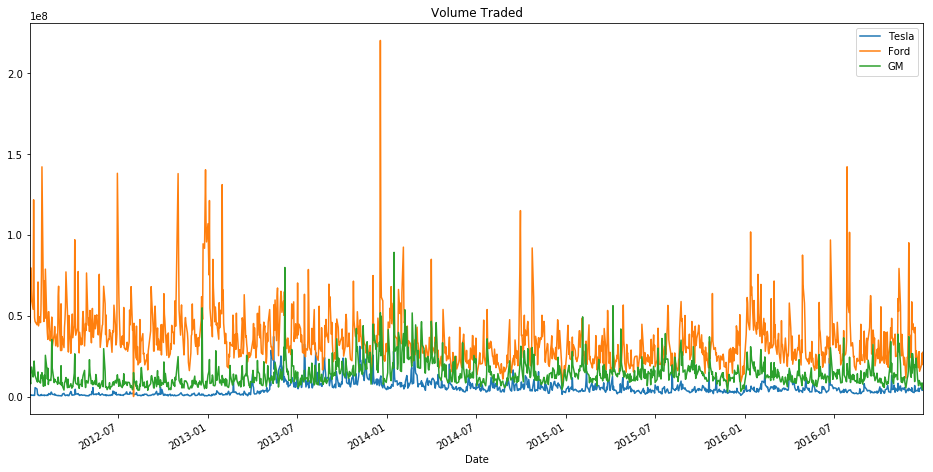

In [44]:
#Plot volume of stock traded each day
tesla['Volume'].plot(figsize = (16,8),label='Tesla',title='Volume Traded')
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label='GM')
plt.legend();

In [45]:
#Find index and maximum value of maximum volume traded of ford
print("Maximum volume traded {} on {}".format(ford['Volume'].max(),ford['Volume'].idxmax()));

Maximum volume traded 220362796 on 2013-12-18 00:00:00


In [46]:
#Ford announced on this day that they would cut back profits by over $500 million and increase production in overseas countries''''''

In [47]:
#New Column Total traded that calculates the total amount of money being traded in this company,just for better understanding of company valuation
tesla['Total Traded'] = tesla['Volume'] * tesla['Open']
ford['Total Traded'] = ford['Volume'] * ford['Open']
gm['Total Traded'] = gm['Volume'] * gm['Open']


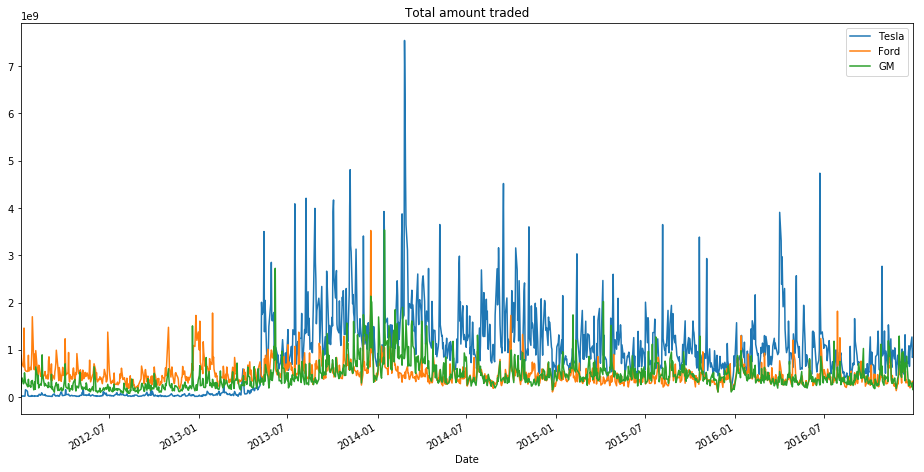

In [48]:
#Plot this new column against Date
tesla['Total Traded'].plot(figsize = (16,8),label='Tesla',title = 'Total amount traded')
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend();

In [49]:
#Find date of maximum amount of money being traded for tesla and reason
print("Maximum amount of Tesla stocks traded {} on {}".format(tesla['Total Traded'].max(),tesla['Total Traded'].idxmax()))

Maximum amount of Tesla stocks traded 7543310000.0 on 2014-02-25 00:00:00


In [50]:
# $7.5 billion dollars worth of stock traded on 25th February 2014
# Elon Musk announced the launching of brand new lithium batter factories that would accelerate the companies car production


In [51]:
#Find moving averages of Ford,GM and Tesla over a period of 30 days
# To find average monthly trend
tesla['50 MA'] = tesla['Open'].rolling(window=30).mean()
ford['50 MA'] = ford['Open'].rolling(window=30).mean()
gm['50 MA'] = gm['Open'].rolling(window=30).mean()

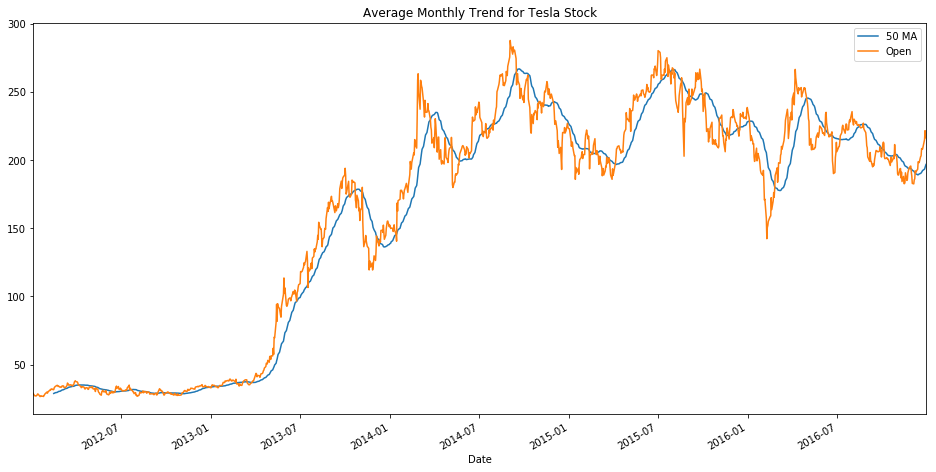

In [100]:
tesla[['50 MA','Open']].plot(figsize=(16,8),title='Average Monthly Trend for Tesla Stock');

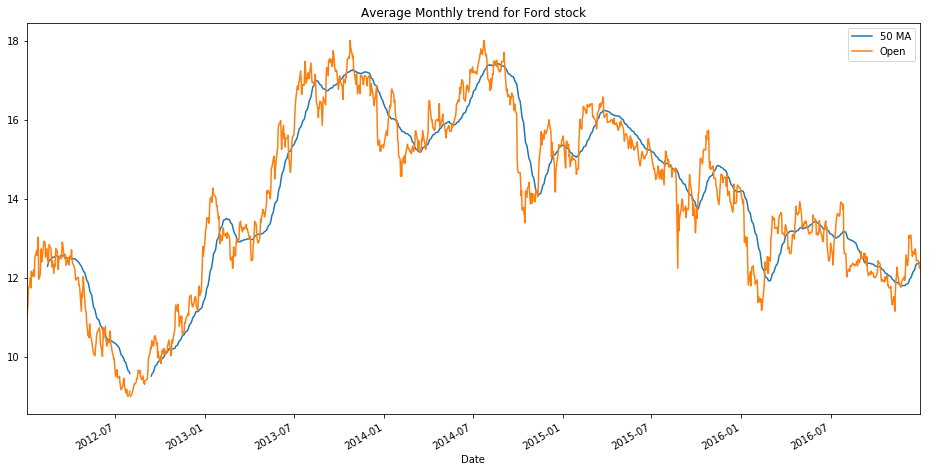

In [101]:
ford[['50 MA','Open']].plot(figsize=(16,8),title='Average Monthly trend for Ford stock');

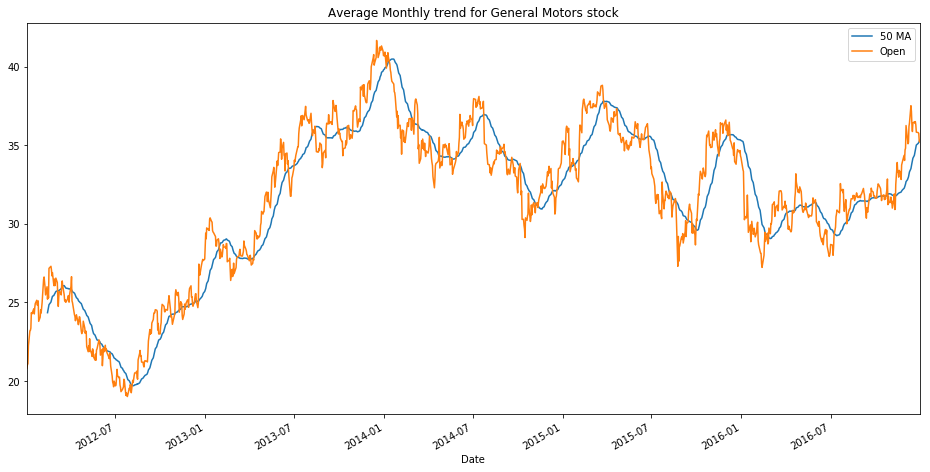

In [102]:
gm[['50 MA','Open']].plot(figsize=(16,8),title = 'Average Monthly trend for General Motors stock');

In [64]:
#Since all these companies are competitors in the same industry,find relation between each of the stock prices
#Create a new column that concatenates Opening prices of all car companies
car_companies = pd.concat([tesla['Open'],ford['Open'],gm['Open']],axis=1)
car_companies.columns = (['Tesla Open','Ford Open','GM Open'])

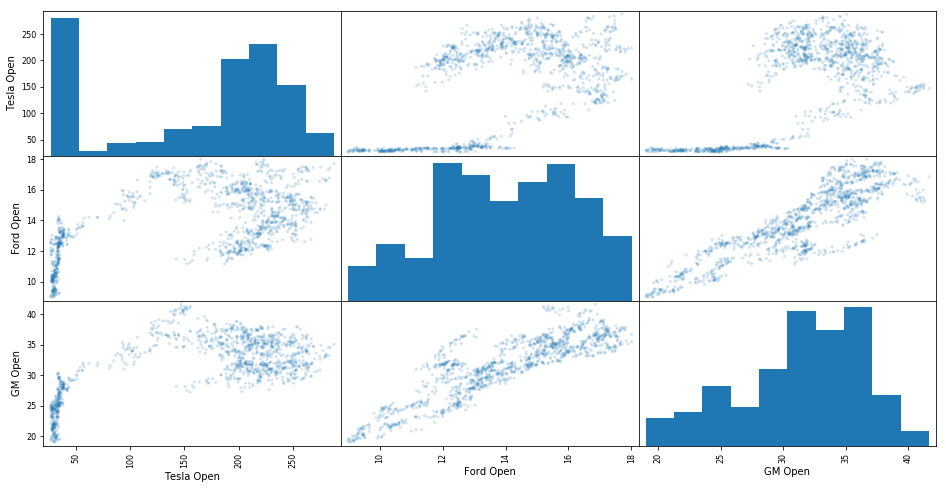

In [65]:
scatter_matrix(car_companies,figsize=(16,8),alpha=0.2);

In [77]:
#Create a candlestick chart for Ford for Jan 2012
ford_reset = ford.loc['2012-01'].reset_index()

In [80]:
#Create a new column to convert date values to numerical values for matplotlib to handle
ford_reset['date_axis'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [88]:
#Create a tuple of Open High Low Close in that particular order
column_list = ['date_axis','Open','High','Low','Close']
ford_values = [tuple(vals) for vals in ford_reset[column_list].values]

In [91]:
#Create candlestick chart
mondays = WeekdayLocator(MONDAY)        # Major ticks on the mondays
alldays = DayLocator()                  # Minor ticks on days
weekFormatter = DateFormatter('%b %d')  # Format date as Month,Date example Jan 23
dayFormatter = DateFormatter('%d')      # Format date


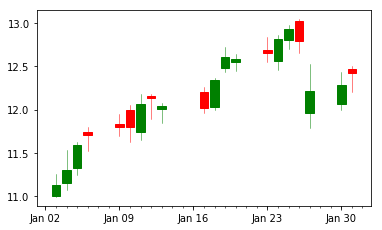

In [99]:
fig,ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)          # Set Major locator on Mondays
ax.xaxis.set_minor_locator(alldays)          # Set Minor locator on all other weekdays
ax.xaxis.set_major_formatter(weekFormatter)  # Formatter for Monday dates
candlestick_ohlc(ax,ford_values,width=0.8,colorup='g',colordown='r');

# A candlestick chart shows 4 values namely:
# Low price - End point of bottom line
# High price - End point of top line
# Open and Close prices are end points of the filled body
# For 'colorup' components, Opening price is higher than Closing price 
# For 'colordown' components, Opening price is lower than Closing price 

In [110]:
# Daily returns
# R(t) = Price(t)/ Price(t-1) - 1
# Determines volatility of stock
#Create daily returns column for all three data frames
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

#Alternative using pct_change of pandas
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)


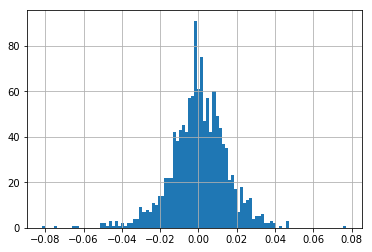

In [113]:
# Find which stock is most volatile using histogram
ford['returns'].hist(bins=100);

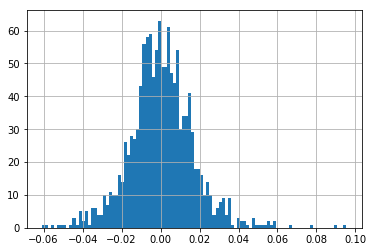

In [115]:
gm['returns'].hist(bins=100);

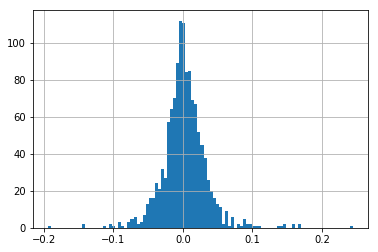

In [117]:
#Tesla returns seem to have higher deviation as the x axis ranges from -0.2 to 0.2
tesla['returns'].hist(bins=100);

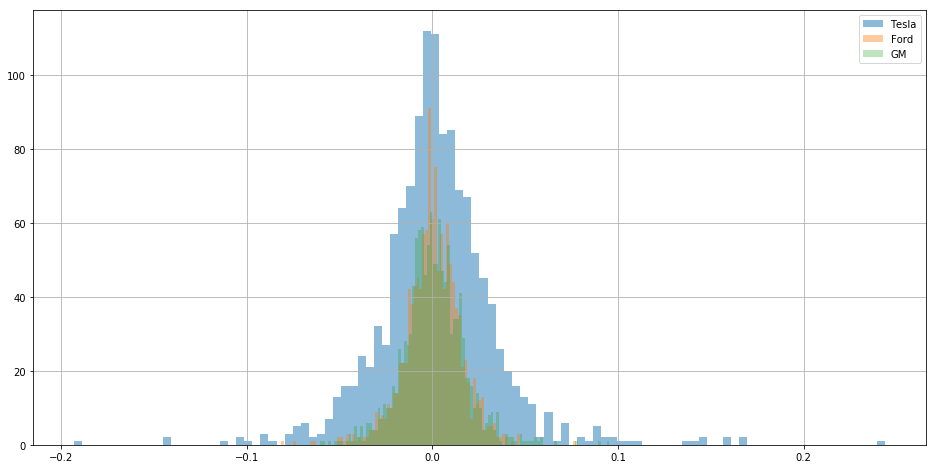

In [122]:
#Stack histograms on top of each other to compare variance of each
tesla['returns'].hist(bins = 100,label='Tesla',figsize=(16,8),alpha=0.5);
ford['returns'].hist(bins = 100,label='Ford',figsize=(16,8),alpha=0.4);
gm['returns'].hist(bins = 100,label='GM',figsize=(16,8),alpha=0.3);
plt.legend();

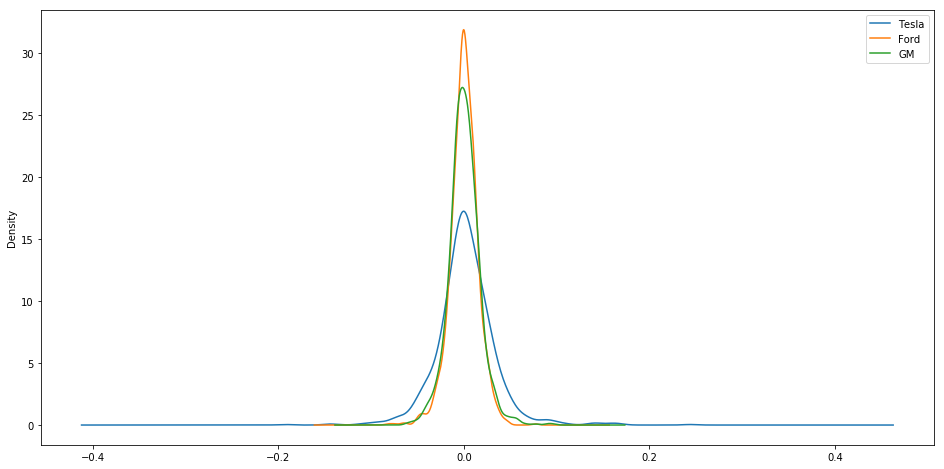

In [123]:
#Kernel Density Estimation plot for each of the returns to get a different view point from the histograms
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(16,8))
ford['returns'].plot(kind='kde',label='Ford',figsize=(16,8))
gm['returns'].plot(kind='kde',label='GM',figsize=(16,8))
plt.legend();

In [124]:
#Ford has highest peak with most stable stock followed by GM and then Tesla

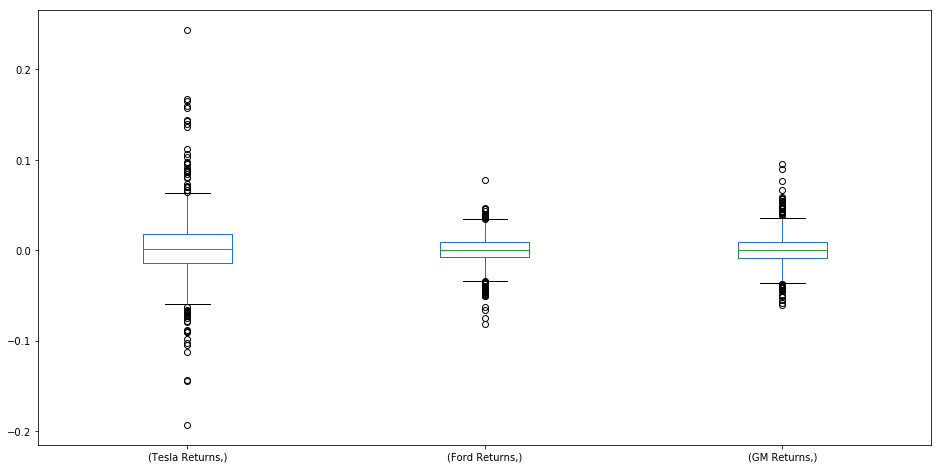

In [130]:
#Create a boxplot to measure mean and find outliers for all stocks
boxplot_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
boxplot_df.columns = [['Tesla Returns','Ford Returns','GM Returns']]
boxplot_df.plot(kind='box',figsize=(16,8))

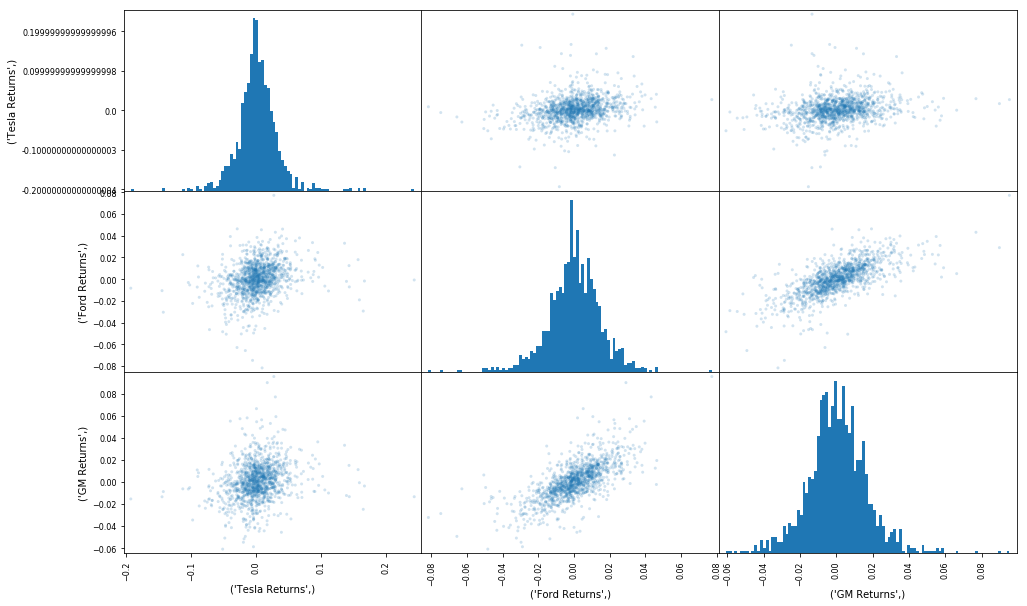

In [132]:
#Compare daily returns between stocks
scatter_matrix(boxplot_df,figsize=(16,10),alpha=0.2,hist_kwds={'bins':100});


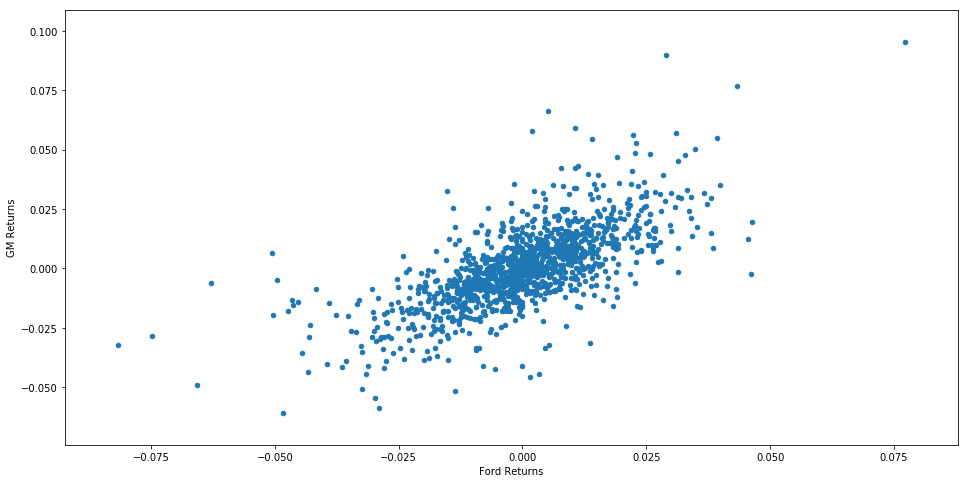

In [135]:
# Ford stock returns and GM stock returns seems to be correlated,plot against each other
boxplot_df.plot(kind='scatter',x='Ford Returns',y='GM Returns',figsize=(16,8));

In [137]:
# Cumulative Daily Returns

# Investment at t = (1 + R(t)) * Investment at (t-1)
# Create cumulative daily return column for each company stock data fram
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

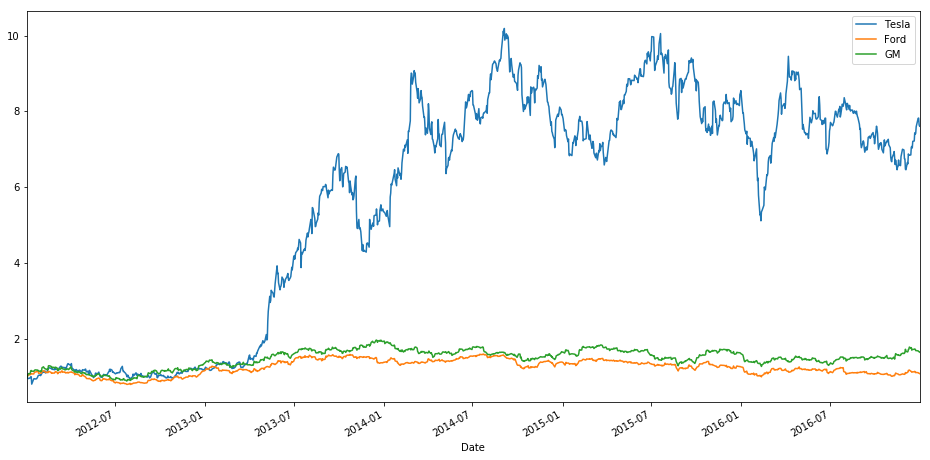

In [138]:
# Plot cumulative returns against date index,try to find the stock that showed highest return for $1 investment\
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM',figsize=(16,8))
plt.legend();

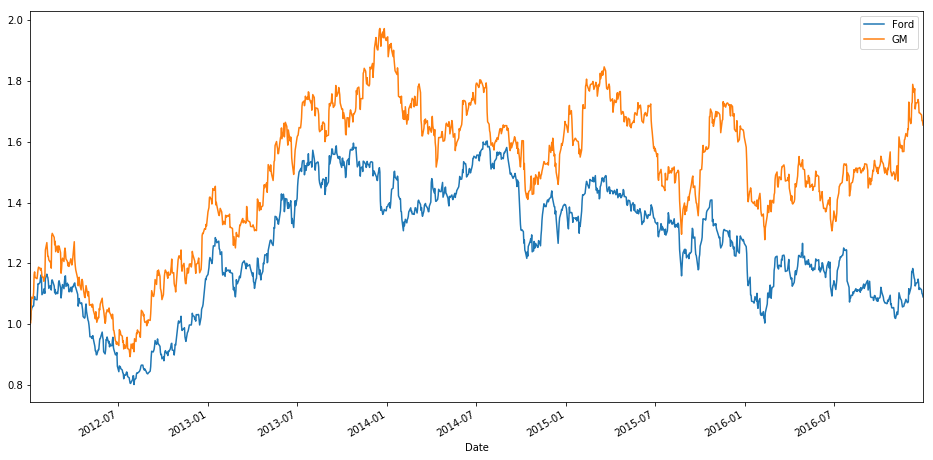

In [139]:
# Compare only Ford and GM
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM',figsize=(16,8))
plt.legend();